In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [2]:
#the start and end date
start_date = dt.datetime(2021,3,1)
end_date = dt.datetime(2023,3,1)

#loading from yahoo finance
data = yf.download("GOOGL",start_date, end_date)

data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,102.400002,103.811501,101.721001,103.483002,103.483002,26060000
2021-03-02,103.241997,104.737000,102.833504,103.223999,103.223999,25564000
2021-03-03,102.597504,103.799500,99.699997,100.570503,100.570503,33892000
2021-03-04,100.743500,103.729500,100.271500,101.696503,101.696503,49216000
2021-03-05,103.057503,105.309998,101.389000,104.853500,104.853500,53100000


In [3]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1] 
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(404, 1) (100, 1)


In [4]:
# Selecting Open Price values
dataset_train = train_data.Open.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(404, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
 
print(scaled_train[:5])

[[0.10350522]
 [0.11895751]
 [0.10712978]
 [0.07310512]
 [0.11557168]]


In [6]:
# Selecting Open Price values
dataset_test = test_data.Open.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(*scaled_test[:5])

[0.7073529] [0.74901949] [0.70833313] [0.66666654] [0.58970578]


In [7]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

In [8]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [9]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (354, 50, 1) y_train : (354, 1)


In [10]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (50, 50, 1) y_test : (50, 1)


In [11]:
# importing libraries
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [12]:
# initializing the RNN
regressor = Sequential()
 
# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
 
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 50))
 
# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))
 
# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")
 
# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
177/177 [==============================] - 11s 23ms/step - loss: 0.0226
Epoch 2/20
177/177 [==============================] - 4s 21ms/step - loss: 0.0093
Epoch 3/20
177/177 [==============================] - 4s 21ms/step - loss: 0.0081
Epoch 4/20
177/177 [==============================] - 4s 21ms/step - loss: 0.0074
Epoch 5/20
177/177 [==============================] - 4s 22ms/step - loss: 0.0068
Epoch 6/20
177/177 [==============================] - 4s 21ms/step - loss: 0.0061
Epoch 7/20
177/177 [==============================] - 3s 19ms/step - loss: 0.0055
Epoch 8/20
177/177 [==============================] - 4s 22ms/step - loss: 0.0050
Epoch 9/20
177/177 [==============================] - 4s 21ms/step - loss: 0.0051
Epoch 10/20
177/177 [==============================] - 3s 20ms/step - loss: 0.0048
Epoch 11/20
177/177 [==============================] - 4s 20ms/step - loss: 0.0046
Epoch 12/20
177/177 [==============================] - 4s 21ms/step - loss: 0.0041
Epoch 13/20


In [13]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)

2/2 [==============================] - 1s 9ms/step


In [14]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 

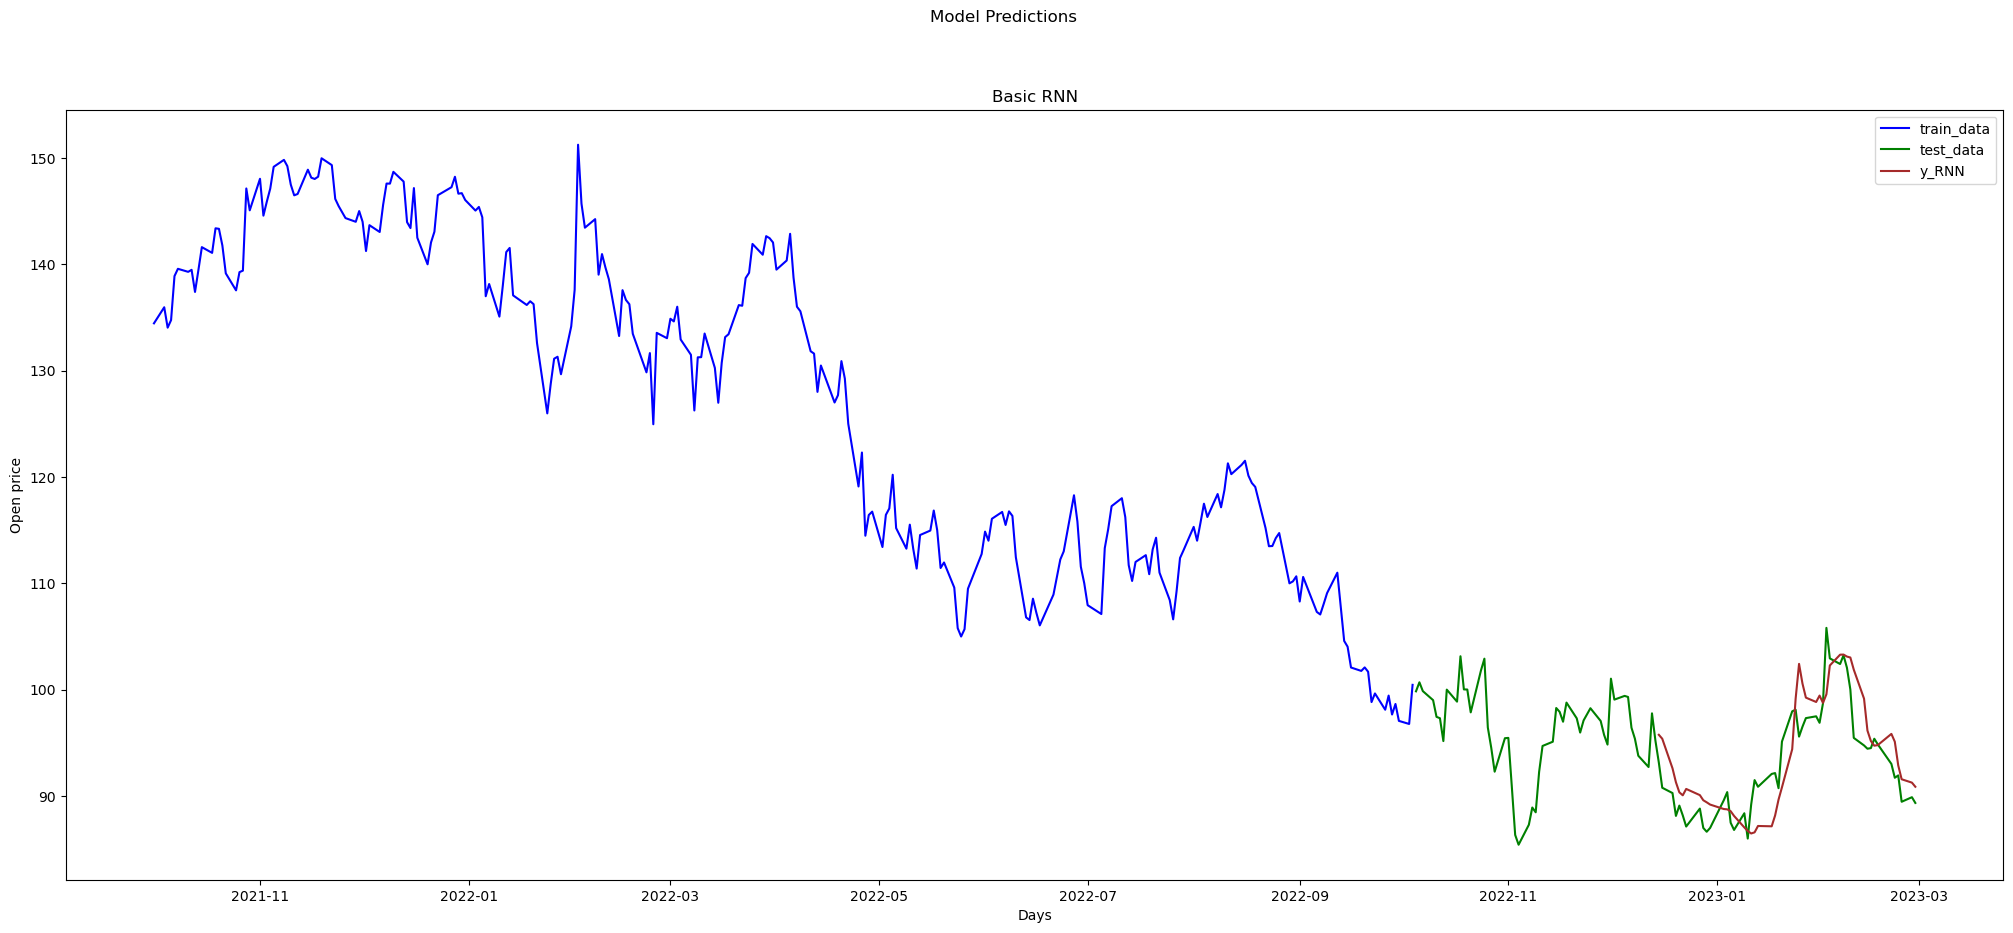

In [15]:
plt.figure(figsize=(25, 10))
plt.suptitle('Model Predictions')

# Plot for RNN predictions
plt.plot(train_data.index[150:], train_data.Open[150:], label="train_data", color="b")
plt.plot(test_data.index, test_data.Open, label="test_data", color="g")
plt.plot(test_data.index[50:], y_RNN_O, label="y_RNN", color="brown")
plt.legend()
plt.title("Basic RNN")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()